# Example Figures 1: Chirp Extraction from the Discrete $\Phi_n$ transform

The goal of this script is to show how to use the dpt software in extracting chirps. These figures will also be in "A Time-Frequency Analysis of Chirps" paper.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from dptcomp.dpfunc import s_n, c_n
import numpy as np
from dpt.transform import DPT, STPT, ISTPT, VVT

## Extracting a Signal Through DPT

We first need to build the signal in the time domain. The previous DPT version uses a signal class, yet that feels clunky and annoying to learn for people so I decided that something easier is just using arrays because literally everyone knows how to use a np.array.

In [2]:
n           = 3/4
fs          = 1024
n_frequency = 1000
times   = np.arange(-4, 0, 1 / fs)
n_frequency_values = np.arange(0, 2048, 1)
signal = c_n(n, n_frequency * times)
signalTranslated = c_n(n, n_frequency * (times - .25))

Making the DPT Transform Object to transform the signal.

In [3]:
dptTransform = DPT(n, times, n_frequency_values)

Constructing S Matrix (Chirp Order 0.7500): 100%|██████████| 2048/2048 [02:51<00:00, 11.95it/s]


In [4]:
amplitude, _ = dptTransform.transform(signal) 
amplitudeTranslated, _ = dptTransform.transform(signalTranslated) 

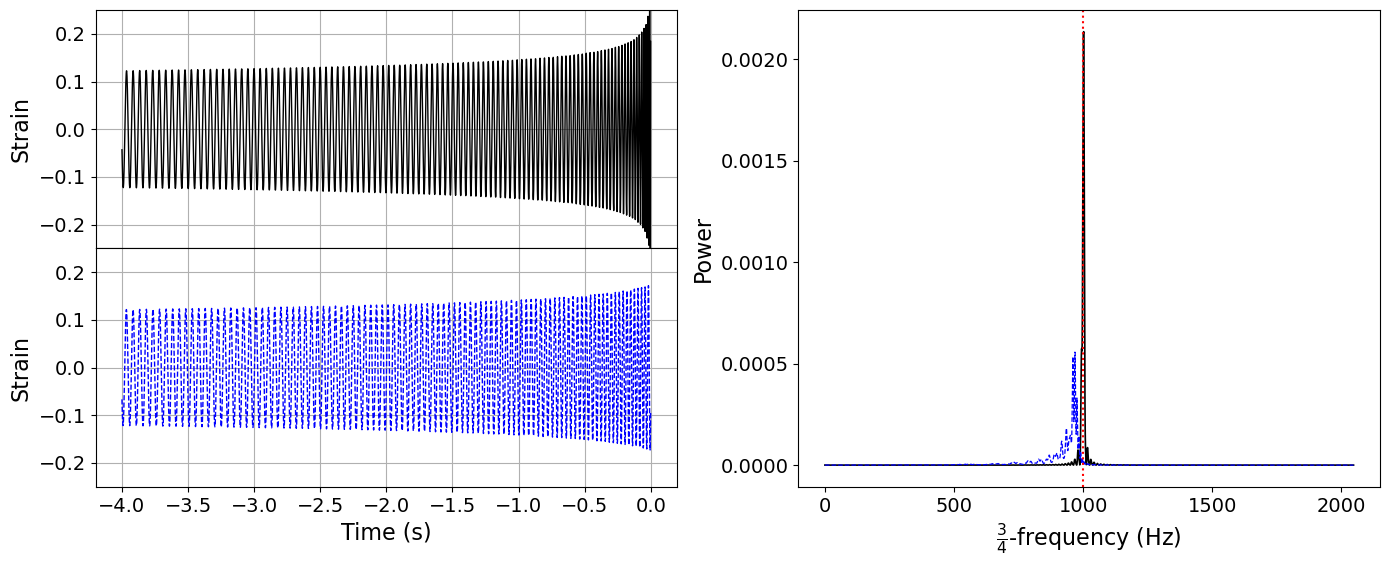

In [5]:
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], hspace=0.0) # Lowkey just used chatGPT for this plot.

# We first do the aligned chirp
ax0 = fig.add_subplot(gs[0, 0])
line1, = ax0.plot(times, signal, color="black", lw=1, label="Aligned Chirp Signal")
ax0.set_ylim(-.25, .25)
ax0.set_ylabel("Strain", fontsize=16)
# Make it not ugly *rolling eyes*
ax0.tick_params(axis='x', which='both', bottom=False)  
ax0.tick_params(labelsize=14)
ax0.grid()

# We next do the uhhh Translated Signal
ax1 = fig.add_subplot(gs[1, 0], sharex=ax0)
line2, = ax1.plot(times, signalTranslated, color="blue", lw=1, linestyle="--", label="Translated Chirp Signal")
ax1.set_ylim(-.25, .25)
ax1.set_xlabel("Time (s)", fontsize=16)
ax1.set_ylabel("Strain", fontsize=16)
ax1.tick_params(labelsize=14)
ax1.grid()

# Right side: Frequency domain
ax2 = fig.add_subplot(gs[:, 1])
line3, = ax2.plot(n_frequency_values, np.abs(amplitude) ** 2, color="black", lw=1.2, label="Aligned Chirp Content")
line4, = ax2.plot(n_frequency_values, np.abs(amplitudeTranslated) ** 2, color="blue", linestyle="--", lw=.9, label="Translated Chirp Content")
ax2.set_xlabel(r"$\frac{3}{4}$-frequency (Hz)", fontsize=16)
ax2.set_ylabel("Power", fontsize=16)
ax2.tick_params(labelsize=14)
ax2.axvline(x=n_frequency, color="red", linestyle=":")


# Shared Legend (bottom center)
# lines = [line1, line2, line3, line4]
# labels = [line.get_label() for line in lines]
# fig.legend(lines, labels, loc="lower center", ncol=2, frameon=False, fontsize=11, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.04, 1, 1])  # Leave space at bottom for legend
plt.show()

## Comparison of Chirp Signals

In Fourier Analysis, there are two main parameters for a pure frequency signal. It is its 
* Frequency
* Amplitude
The frequency says where in the frequency-plane the power is localized while the amplitude says how much power is localized. Now, in the case of short-time Fourier analysis, we also get a time $t$ which happens for localized frequency bursts or something like a chirp. In the time-frequency plane, depending on the window size we can localize the frequency or the time at which it occurs. For a chirping signal, in the time-frequency plane, we get three parameters.

For the discrete $\Phi_n$ transform, we have 4 parameters due to the translation invariance and other degrees of freedoms of the chirp. We define the following
* up-chirp: Chirp whose frequency increases with time
* down-chirp: Chirp whose frequency decreases with time.
where we are talking about the Fourier frequency or what you would receive on a spectrogram. Now, we have the following, cases for the *chirp-order* $n$.
* n < 1: Largest amplitude at $t = 0$, decays further away.
* n = 1: This is the Normal Fourier Case, no chirping behavior or amplitude changes
* n > 1: Smallest amplitude at $t = 0$, builds up amplitude further away.
Interestingly enough, for $n \neq 1$, the cases have both up-chirps and down-chirps centered about $t = 0$. Chirps have 4 characteristic parameters that describe them in the $\Phi_n$ sense
* chirp-order (n, unitless): A chirp parameter which describes what waveform or integral kernel best extracts it.
* chirp-frequency ($\omega$, Hz): Where in the chirp-frequency plane it will be localized given it is properly aligned
* chirp-time or central-time (s): The center of the chirp (There is some point at which the frequency starts). This is new and not described in the Fourier case due to the Fourier case's translation property
* amplitude (Depends on the Signal Strain): The relative size of the chirp.
In general a real signal with a chirp that can be extracted under the $\Phi_n$ transform
\begin{equation}
x(t) = \operatorname{Re}\left(\exp(-i\phi_0)\varphi_n(\omega_0 (t - t_c)) \right)
\end{equation}
Read my paper for more details on the parameters of chirps and how they relate to the qualitative behavior. Or just code up some examples to see for yourself.

<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_597/2007870616.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.suptitle("Examples of Generalized Chirps $s_n(n, \omega t)$", fontsize=14)


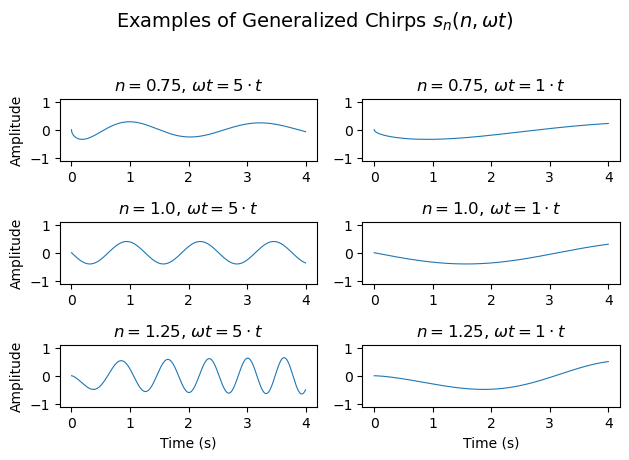

In [18]:
fs = 4096
times = np.arange(0, 4, 1/fs)

n_values = [0.75, 1.0, 1.25]
omega_scales = [5, 1]  # Two different frequencies for each n

fig, axes = plt.subplots(3, 2)

for i, n in enumerate(n_values):
    for j, scale in enumerate(omega_scales):
        omega_t = scale * times
        signal = s_n(n, omega_t)

        ax = axes[i, j]
        ax.plot(times, signal, lw=0.8)
        ax.set_title(rf"$n = {n}$, $\omega t = {scale} \cdot t$", fontsize=12)
        ax.set_ylim(-1.1, 1.1)
        if i == len(n_values) - 1:
            ax.set_xlabel("Time (s)", fontsize=10)
        if j == 0:
            ax.set_ylabel("Amplitude", fontsize=10)

plt.suptitle("Examples of Generalized Chirps $s_n(n, \omega t)$", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

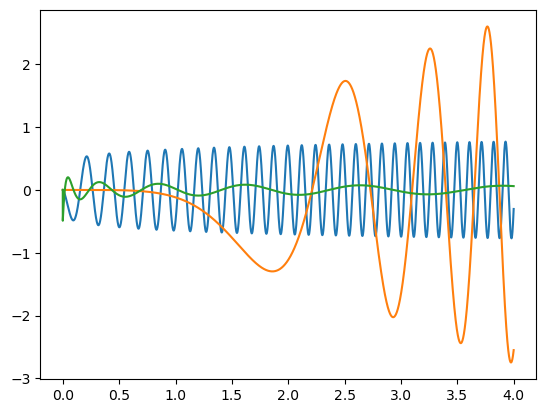

In [98]:
plt.plot(times, signal)
plt.plot(times, signal2)
plt.plot(times, signal3)

## Short-Time $\Phi_n$ transform and Chirps

In an attempt to study chirps at arbitrary central-times, we need new machinery to study such a system. We can do this by making the Short-Time $\Phi_n$ transform. Thus, we will inject a chirp-signal into noise and try to extract it. We expect to see a peak for a CBC merger or a chirping signal, but not something like a blip glitch. We will inject both into a long signal and see if it can properly extract the CBC versus the simulated blip glitch signal. Unlike in normal Fourier frequency where the blip glitch has a lot of power over many frequencies analogous to what we see for a CBC, we are looking for the characteristic frequency growth over a certain amount of windowed time. 

In [100]:
def blip_glitch(time, central_frequency: float, quality_factor: float, blip_time: float) -> np.array:
    """
    Example glitch signal, using a blip glitch.
    """
    return np.exp(- (time - blip_time) ** 2 / (2 * quality_factor) ** 2) * np.sin(central_frequency * (time - blip_time))

In [1]:
# Parameters for the system
fs                 = 1024 # Sampling Frequency
total_time         = 4   # Seconds
N                  = int(fs * total_time)
sigma              = 1
times              = np.arange(0, total_time, 1 / fs)

injected_chirp_signal = np.zeros(N)

# Chirp Parameters 1
n                  = 5/8  # Chirp Order
chirp_frequency    = 600  # Chirp Frequency
chirp_time         = 4   # Where the merger occurs
tail_start         = 4    # Chirp exists up to four seconds before the so-called merger
chirp_amplitude    = 3    # Amplitude of the Chirp-Signal we are attempting to extract

chirp_sig_times       = np.arange(-1 * tail_start, 0, 1 / fs)
quarter_chirp_signal  = chirp_amplitude * c_n(n, chirp_frequency * chirp_sig_times)
injected_chirp_signal[fs * (chirp_time - tail_start):fs * chirp_time] += quarter_chirp_signal

# White Noise By Itself
white_noise_signal    = np.random.normal(loc=0.0, scale=np.sqrt(sigma), size=N)
noisy_chirp           = white_noise_signal + injected_chirp_signal

NameError: name 'np' is not defined

Text(0, 0.5, 'Strain (Unitless)')

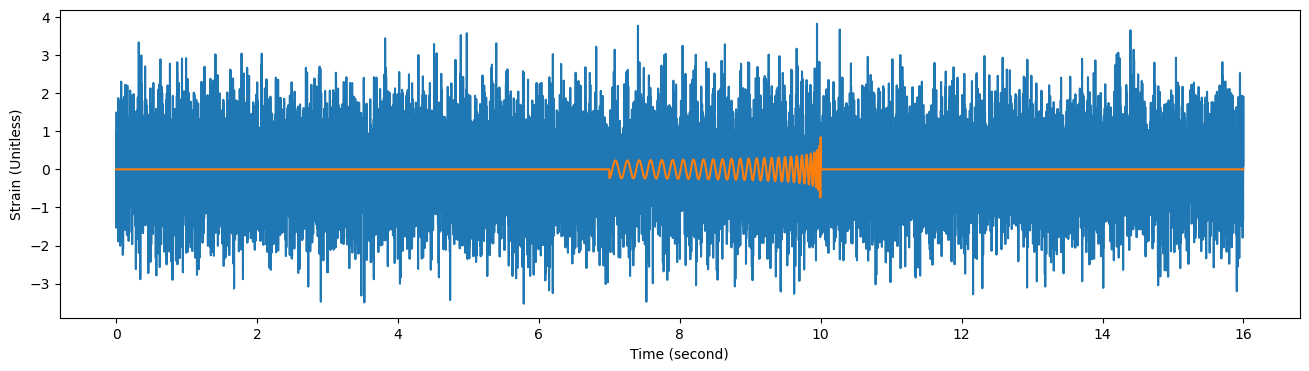

In [152]:
plt.figure(figsize=(16, 4))
plt.plot(times, noisy_chirp)
plt.plot(times, injected_chirp_signal)
plt.xlabel("Time (second)")
plt.ylabel("Strain (Unitless)")

In [154]:
# STPT Parameters
window_size       = 4 * fs # 2 second window.
chirp_frequencies = np.arange(0, 1024, 1)
stptTransform     = STPT(n, fs, chirp_frequencies, window_size)

Constructing S Matrix (Chirp Order 0.6250): 100%|██████████| 1024/1024 [01:05<00:00, 15.69it/s]


In [155]:
pixel_values, _  = stptTransform.transform(noisy_chirp) # I can't make a loading bar for np.matmul im so sorry yall.

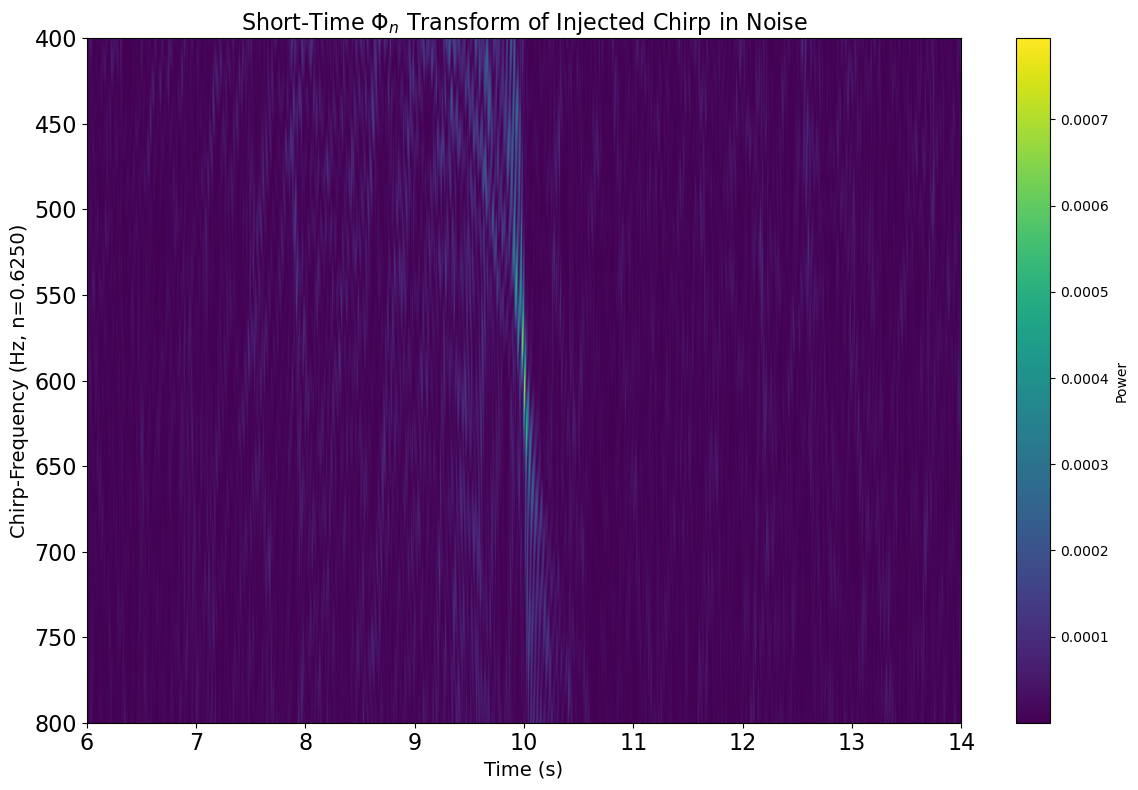

In [161]:

# Example bounds (change as needed)
t_min = 6.0  
t_max = 14.0 

freq_min = 400
freq_max = 800

# Calculate time and frequency axes
x_vals = np.linspace(0, times[-1], pixel_values.shape[1])
y_vals = np.linspace(0, chirp_frequencies[-1], pixel_values.shape[0])

# Find index bounds for time slicing
x_indices = np.where((x_vals >= t_min) & (x_vals <= t_max))[0]
y_indices = np.where((y_vals >= freq_min) & (y_vals <= freq_max))[0]

xmin_idx, xmax_idx = x_indices[0], x_indices[-1]
ymin_idx, ymax_idx = y_indices[0], y_indices[-1]

# Crop the pixel_values array to match the time bounds
cropped_pixel_values = pixel_values[ymin_idx:ymax_idx + 1, xmin_idx:xmax_idx + 1]
cropped_x_vals = x_vals[xmin_idx:xmax_idx + 1]
cropped_y_vals = y_vals[ymin_idx:ymax_idx + 1]

# Calculate power and find max
power = np.abs(cropped_pixel_values) ** 2
max_idx = np.unravel_index(np.argmax(power), power.shape)
max_y_idx, max_x_idx = max_idx
max_time = cropped_x_vals[max_x_idx]
max_freq = y_vals[max_y_idx]
max_power = power[max_y_idx, max_x_idx]

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(
    power,
    aspect='auto',
    origin='upper',
    cmap='viridis',
    extent=[cropped_x_vals[0], cropped_x_vals[-1], cropped_y_vals[-1], cropped_y_vals[0]]  # match actual units
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel(f"Chirp-Frequency (Hz, n={n:.4f})", fontsize=14)
plt.title(r"Short-Time $\Phi_n$ Transform of Injected Chirp in Noise", fontsize=16)
plt.colorbar(label='Power')
plt.tight_layout()
plt.show()

## VVT Transform

For a signal which has an unknown chirp order over some range (a, b), we can build a VVT transform to study the chirp orders of a signal that the chirps get extracted at. This allows us to characterize the behavior of a system. For example, we can use the VVT to find the chirp-order of CBC signals at the merger and to see where we can best build transforms in detecting these mergers. We will specifically do this for BBH systems that are the most common (We will need to find a population thing for that). This is just a test of concept.

In [77]:
n_range           = np.arange(.68, .72, .01)    # Pretty Large amount of chirp-values over a range, but relatively coarse.
chirp_frequencies = np.arange(1, 1000, 5)      # Chirp Frequencies associated to each of the chirp orders, I might allow them to vary at a later time
fs                = 1024
window_size       = 2048                        # For Larger CBC signals, they merge far faster and thus will have extremely short chirps

In [78]:
vvtTransform      = VVT(n_range, fs, chirp_frequencies, window_size)

Constructing S Matrix (Chirp Order 0.7100): 100%|██████████| 200/200 [00:06<00:00, 31.08it/s]


In [79]:
time = np.arange(0, 5, 1/512)
chirp_signal = c_n(.69, 300 * (time - 3))

voxel_grid, _, _ = vvtTransform.transform(chirp_signal) 

In [80]:
print(voxel_grid.shape)
for i in range(np.shape(voxel_grid)[2]): # Iterates over chirp orders
    print((np.isnan(voxel_grid[:, :, i])).any())

(200, 2560, 4)
False
False
False
False


601
0.375
6


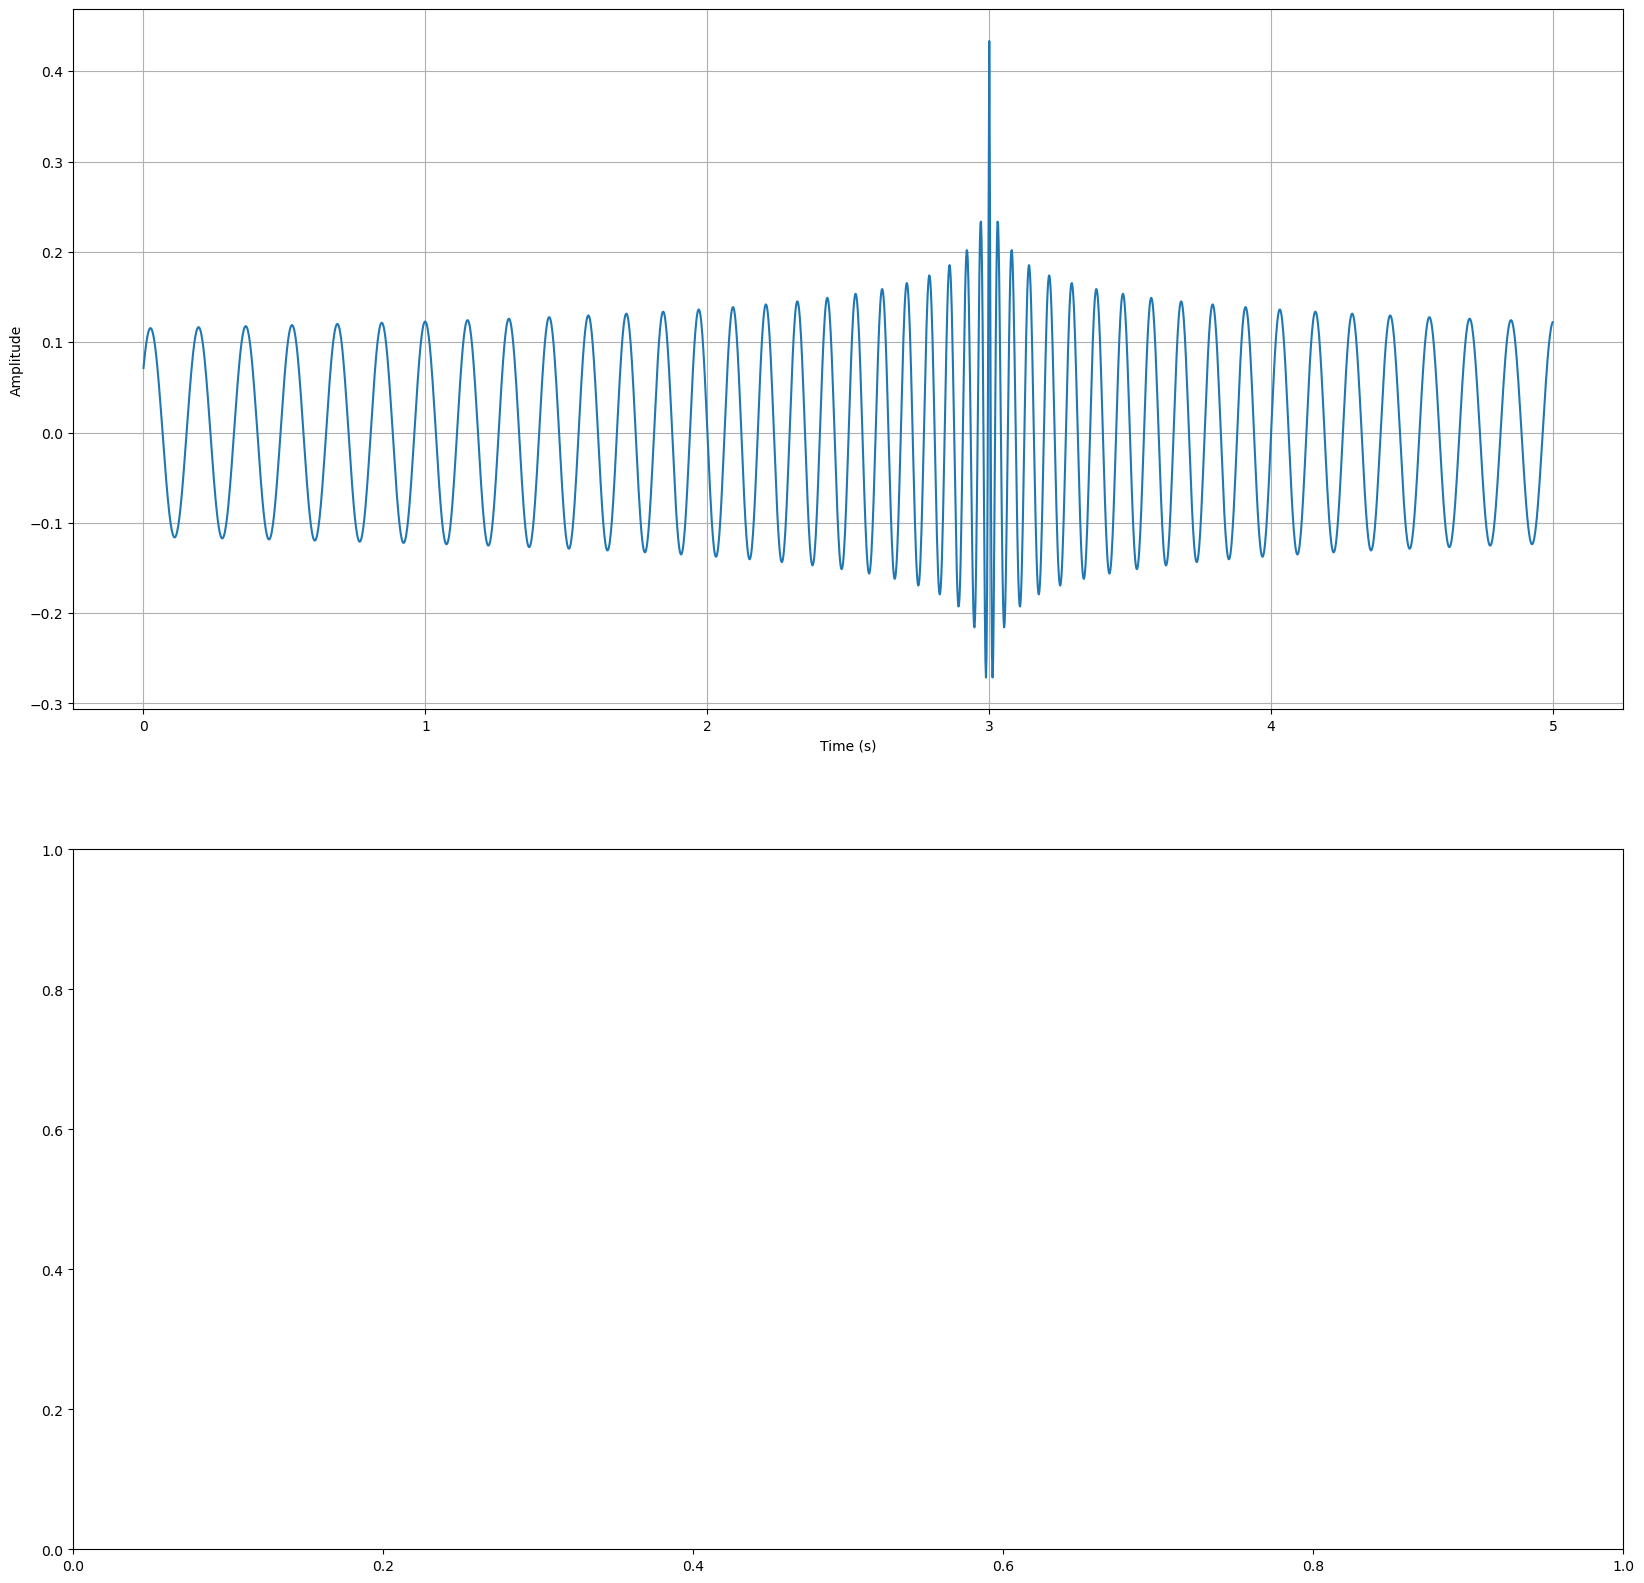

In [84]:
fig, axes =  plt.subplots(2, 1, figsize=(20, 20))
axes[0].plot(time, chirp_signal)
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

idx = np.unravel_index(np.argmax(np.abs(voxel_grid)), voxel_grid.shape)
print(chirp_frequencies[idx[0]])
print(times[idx[1]])
print(chirp_frequencies[idx[2]])

